***ASSIGNMENT-3***
---------------**First Part**-----------------

In [0]:

import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split 
from sklearn.datasets import fetch_lfw_people 
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 
from sklearn.decomposition import PCA 
from sklearn.svm import SVC 

import numpy as np 


In [2]:
# this command will download the LFW_people's dataset to hard disk. 
lfw_people = fetch_lfw_people(min_faces_per_person = 100) 


n_samples, h, w = lfw_people.images.shape 

 
X = lfw_people.data 
n_features = X.shape[1] 

y = lfw_people.target 
target_names = lfw_people.target_names 
n_classes = target_names.shape[0] 
 
print("Number of Data Samples: % d" % n_samples) 
print("Size of a data sample: % d" % n_features) 
print("Number of Class Labels: % d" % n_classes) 


Number of Data Samples:  1140
Size of a data sample:  2914
Number of Class Labels:  5


In [0]:
# Function to plot images 
def plot_gallery(images, titles, h, w, n_row = 3, n_col = 4): 
	plt.figure(figsize =(1.8 * n_col, 2.4 * n_row)) 
	plt.subplots_adjust(bottom = 0, left =.01, right =.99, top =.90, hspace =.35) 
	for i in range(n_row * n_col): 
		plt.subplot(n_row, n_col, i + 1) 
		plt.imshow(images[i].reshape((h, w)), cmap = plt.cm.gray) 
		plt.title(titles[i], size = 12) 
		plt.xticks(()) 
		plt.yticks(()) 




In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42) 
print("size of training Data is % d and Testing Data is % d" %(y_train.shape[0], y_test.shape[0])) 


size of training Data is  798 and Testing Data is  342


In [5]:
n_components = 100
 
pca = PCA(n_components = n_components).fit(X_train) 

eigenfaces = pca.components_.reshape((n_components, h, w)) 

print("Projecting the input data on the eigenfaces orthonormal basis") 
X_train_pca = pca.transform(X_train) 
X_test_pca = pca.transform(X_test)  


Projecting the input data on the eigenfaces orthonormal basis


In [6]:
#print("Sample Data point after applying PCA\n", X_train_pca[0]) 
#print("-----------------------------------------------------") 
print("Dimesnsions of training set = % s and Test Set = % s"%(X_train.shape, X_test.shape)) 


Dimesnsions of training set = (798, 2914) and Test Set = (342, 2914)


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


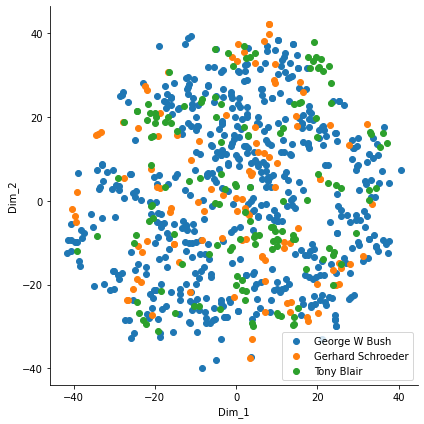

In [7]:
# TSNE 
from sklearn.manifold import TSNE
import pandas as pd
import seaborn as sn 
#pca_result = pca.fit_transform(data_subset)
#df_subset['pca-one'] = pca_result[:,0]
#df_subset['pca-two'] = pca_result[:,1] 
#df_subset['pca-three'] = pca_result[:,2]
model = TSNE(n_components = 2, random_state = 0) 


tsne_data = model.fit_transform(X) 


tsne_data = np.vstack((tsne_data.T, y)).T 
tsne_df = pd.DataFrame(data = tsne_data, columns =("Dim_1", "Dim_2", "label")) 
df_filtered = tsne_df[tsne_df['label'] >= 2]
# Ploting the result of tsne 
sn.FacetGrid(df_filtered, hue ="label", size = 6).map(plt.scatter, 'Dim_1', 'Dim_2')
L=plt.legend()
L.get_texts()[0].set_text('George W Bush')
L.get_texts()[1].set_text('Gerhard Schroeder')
L.get_texts()[2].set_text('Tony Blair')
plt.show() 


In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_pca, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test_pca)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred,target_names=target_names))

Accuracy: 0.631578947368421
                   precision    recall  f1-score   support

     Colin Powell       0.58      0.71      0.64        78
  Donald Rumsfeld       0.65      0.45      0.53        38
    George W Bush       0.68      0.82      0.74       159
Gerhard Schroeder       0.22      0.07      0.10        30
       Tony Blair       0.57      0.32      0.41        37

         accuracy                           0.63       342
        macro avg       0.54      0.47      0.49       342
     weighted avg       0.60      0.63      0.60       342



In [0]:
def plot_portraits(images, titles, h, w, n_row, n_col):
    plt.figure(figsize=(2.2 * n_col, 2.2 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.20)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i])
        plt.xticks(())
        plt.yticks(())

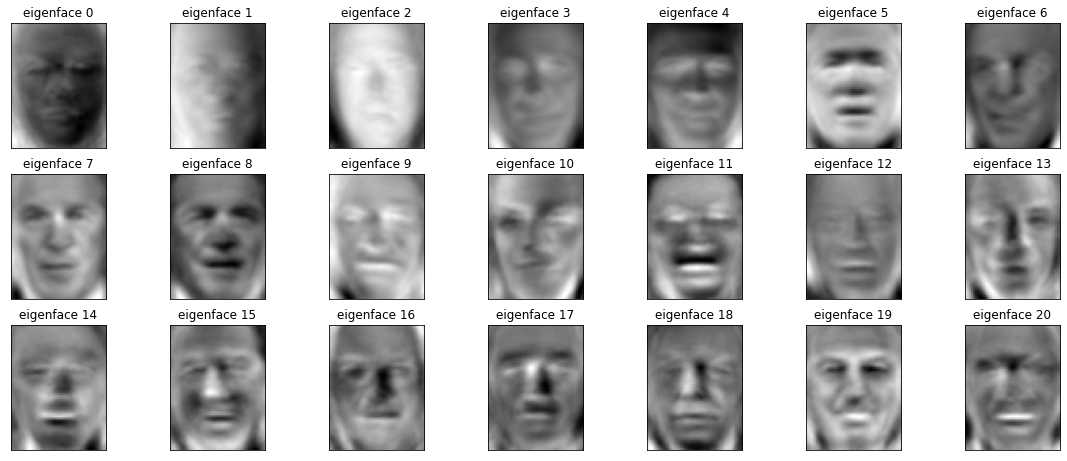

In [10]:
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_portraits(eigenfaces, eigenface_titles, h, w, 3, 7)

In [11]:
print(pca.explained_variance_)
print(pca.explained_variance_ratio_.sum())

[768296.8    666433.     317753.72   249063.81   223544.03   128248.75
 107676.695   92650.86    81882.586   80184.12    69020.01    59898.5
  52776.723   47952.754   43431.33    41205.086   39120.844   37402.426
  33910.234   30809.852   28859.957   27480.83    25621.23    24911.707
  23695.586   21911.453   20981.611   20094.174   19319.215   18217.031
  16896.959   16648.305   15870.254   15375.402   14539.953   13987.125
  13669.33    13219.841   12702.63    12552.72    12021.86    11300.164
  11131.213   10699.415   10272.559   10126.688    9888.879    9849.99
   9440.122    8966.903    8781.103    8774.742    8595.48     8335.782
   8096.95     7820.1807   7737.406    7552.2085   7430.0728   7278.34
   6963.755    6895.238    6788.831    6625.885    6569.249    6441.0376
   6393.4697   6092.6655   6050.742    5934.8994   5797.7593   5637.6543
   5596.6313   5530.182    5374.1255   5302.322    5266.647    5099.4194
   4997.3906   4901.726    4843.0034   4722.0864   4647.462    449

In [12]:
#finding the value of x in 5th part
for i in range(1,100):  
  pca = PCA(n_components = i).fit(X_train)
  if pca.explained_variance_ratio_.sum() >=0.8:
    print(i)
    break 


30


In [13]:
pca = PCA(n_components = 30).fit(X_train) 
#print("done in % 0.3fs" % (time() - t0)) 

#eigenfaces = pca.components_.reshape((n_components, h, w)) 

#print("Projecting the input data on the eigenfaces orthonormal basis") 
#t0 = time() 
X_train_pca = pca.transform(X_train) 
X_test_pca = pca.transform(X_test)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_pca, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test_pca)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred,target_names=target_names))

Accuracy: 0.5877192982456141
                   precision    recall  f1-score   support

     Colin Powell       0.46      0.63      0.53        78
  Donald Rumsfeld       0.53      0.50      0.51        38
    George W Bush       0.69      0.74      0.72       159
Gerhard Schroeder       0.40      0.13      0.20        30
       Tony Blair       0.55      0.30      0.39        37

         accuracy                           0.59       342
        macro avg       0.53      0.46      0.47       342
     weighted avg       0.58      0.59      0.57       342



**------------------------------------Second Part-------------------------------------**

In [14]:
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

iris = datasets.load_iris()
#iris = load_iris()

iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],columns= iris['feature_names'] + ['target'])
#iris_df = pd.DataFrame(iris.data, columns = iris.columns)
iris_df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [0]:
from sklearn.preprocessing import StandardScaler
features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
# Separating out the features
x2= iris_df.loc[:, features].values
# Separating out the target
y2 = iris_df.loc[:,['target']].values
x2 = StandardScaler().fit_transform(x2)

In [0]:
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x2)
#principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

In [0]:
iris["one"]=x_pca[:,0]
iris["two"]=x_pca[:,1]

Text(0, 0.5, 'sepal length')

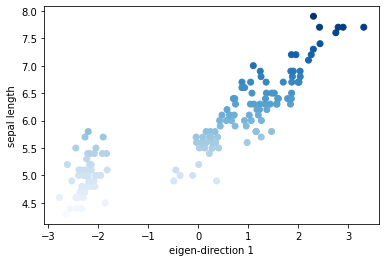

In [18]:
plt.scatter(x = iris["one"], y=iris_df['sepal length (cm)'], c=iris.data[:,0],cmap="Blues") 
plt.xlabel('eigen-direction 1')
plt.ylabel('sepal length')
#print("PCA plot with sepal length colour coding\n")

Text(0, 0.5, 'sepal width')

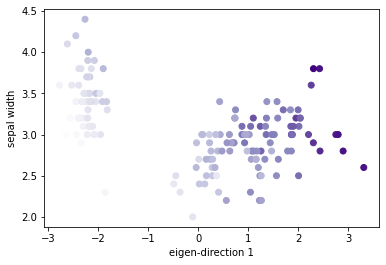

In [19]:
plt.scatter(x = iris["one"], y=iris_df['sepal width (cm)'], c=iris.data[:,0],cmap="Purples") 
plt.xlabel('eigen-direction 1')
plt.ylabel('sepal width')

Text(0, 0.5, 'petal length')

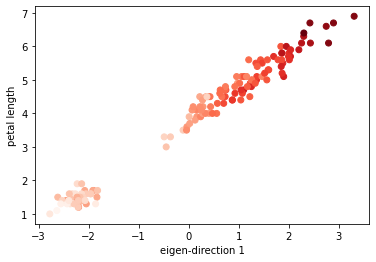

In [20]:
plt.scatter(x = iris["one"], y=iris_df['petal length (cm)'], c=iris.data[:,0],cmap="Reds") 
plt.xlabel('eigen-direction 1')
plt.ylabel('petal length')

Text(0, 0.5, 'petal width')

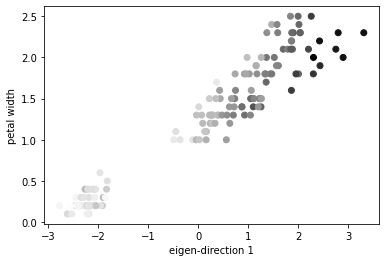

In [21]:
plt.scatter(x = iris["one"], y=iris_df['petal width (cm)'], c=iris.data[:,0],cmap="Greys") 
plt.xlabel('eigen-direction 1')
plt.ylabel('petal width')

Text(0, 0.5, 'sepal width')

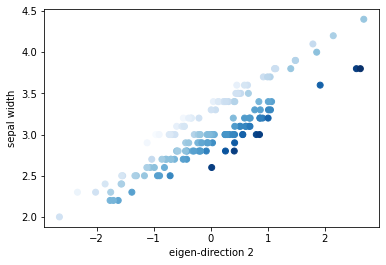

In [22]:
plt.scatter(x = iris["two"], y=iris_df['sepal width (cm)'], c=iris.data[:,0],cmap="Blues") 
plt.xlabel('eigen-direction 2')
plt.ylabel('sepal width')

Text(0, 0.5, 'petal width')

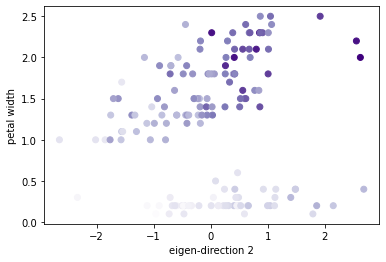

In [23]:
plt.scatter(x = iris["two"], y=iris_df['petal width (cm)'], c=iris.data[:,0],cmap="Purples")
plt.xlabel('eigen-direction 2')
plt.ylabel('petal width') 

Text(0, 0.5, 'petal length')

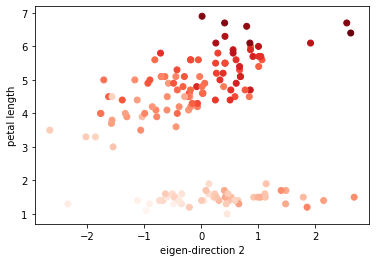

In [24]:
plt.scatter(x = iris["two"], y=iris_df['petal length (cm)'], c=iris.data[:,0],cmap="Reds") 
plt.xlabel('eigen-direction 2')
plt.ylabel('petal length')

Text(0, 0.5, 'sepal length')

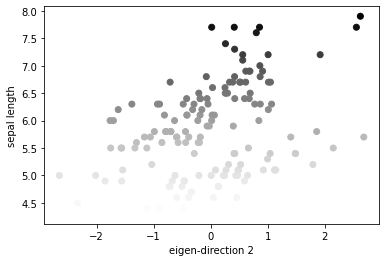

In [25]:
plt.scatter(x = iris["two"], y=iris_df['sepal length (cm)'], c=iris.data[:,0],cmap="Greys")
plt.xlabel('eigen-direction 2')
plt.ylabel('sepal length')

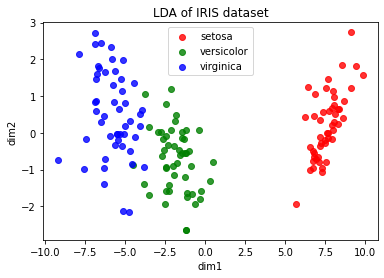

In [27]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
X = iris.data
y = iris.target
lda = LinearDiscriminantAnalysis(n_components=2)
X_r = lda.fit(X, y).transform(X)
target = iris.target_names
colors=['red','green','blue']
for color, i, target_name in zip(colors, [0, 1, 2], target):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], alpha=.8, color=color,label=target_name)
plt.legend(loc='best',scatterpoints=1)
plt.title('LDA of IRIS dataset')
plt.xlabel('dim1')
plt.ylabel('dim2')

plt.show()

    LDA on 3 pair of classes(reduced to only one Dimension)
       3 different colours for 3 different pairs


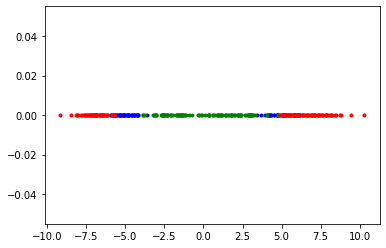

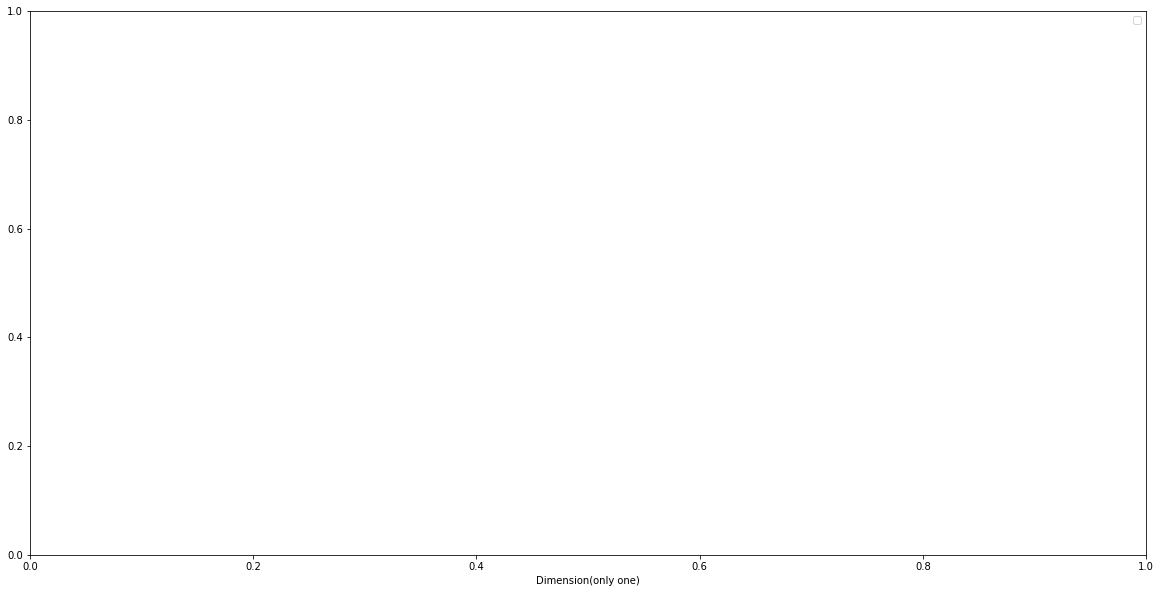

In [28]:
lda = LinearDiscriminantAnalysis(n_components=1)
x_lda_1 = lda.fit(X[:100], y[:100]).transform(X[:100])
ar = np.array(x_lda_1)
plt.plot(ar, np.zeros_like(ar) + 0, '.',color='b')
#plt.show()
x_lda_2 = lda.fit(X[50:], y[50:]).transform(X[50:])
ar = np.array(x_lda_2)
plt.plot(ar, np.zeros_like(ar) + 0, '.',color='g')
X_3=np.concatenate((X[:50],X[100:]),axis=0)
y_3=np.concatenate((y[:50],y[100:]),axis=0)
x_lda_3 = lda.fit(X_3, y_3).transform(X_3)
#print(x_lda_3)
ar = np.array(x_lda_3)
plt.plot(ar, np.zeros_like(ar) + 0, '.',color='r')
plt.figure(figsize=(20,10))
plt.legend(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
plt.xlabel('Dimension(only one)')
#plt.axvline(x=0.2)
print("    LDA on 3 pair of classes(reduced to only one Dimension)")
print("       3 different colours for 3 different pairs")
#plt.axvline(x=0.5)
#plt.show()

{'angle': 0.5, 'early_exaggeration': 12.0, 'init': 'random', 'learning_rate': 200.0, 'method': 'barnes_hut', 'metric': 'euclidean', 'min_grad_norm': 1e-07, 'n_components': 2, 'n_iter': 1000, 'n_iter_without_progress': 300, 'n_jobs': None, 'perplexity': 30.0, 'random_state': None, 'verbose': 0}


No handles with labels found to put in legend.


Legend


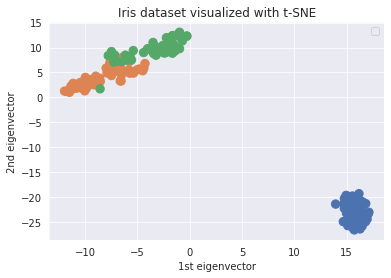

In [29]:
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
PALETTE = sn.color_palette('deep', n_colors=3)
CMAP = ListedColormap(PALETTE.as_hex())

def plot_iris_2d(x, y, title, xlabel="1st eigenvector", ylabel="2nd eigenvector"):
    sn.set_style("darkgrid")
    
    plt.scatter(x, y,
        c=iris_df['target'],
        cmap=CMAP,
        s=70)
    
    plt.title(title)
    plt.legend(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
    plt.legend(loc='best')
    #plt.add_legend()
    print(L)
    #L.get_texts()[0].set_text('George W Bush')
    #L.get_texts()[1].set_text('Gerhard Schroeder')
    #L.get_texts()[2].set_text('Tony Blair')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

def plot_iris_3d(x, y, z, title):
    sn.set_style('whitegrid')
    
    fig = plt.figure(1, figsize=(8, 6))
    ax = Axes3D(fig, elev=-150, azim=110)
    
    ax.scatter(x, y, z,
               c=iris_df['target'],
               cmap=CMAP,
               s=40)
    
    ax.set_title(title, fontsize=20, y=1.03)
    
    #fsize = 14
    ax.set_xlabel("1st eigenvector")
    ax.set_ylabel("2nd eigenvector")
    ax.set_zlabel("3rd eigenvector")
    #ax.legend(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])

tsne = TSNE(n_components=2)
print(tsne.get_params())
points = tsne.fit_transform(iris_df[features])
plot_iris_2d(x = points[:, 0],y = points[:, 1],title = 'Iris dataset visualized with t-SNE')

{'angle': 0.5, 'early_exaggeration': 12.0, 'init': 'random', 'learning_rate': 200.0, 'method': 'barnes_hut', 'metric': 'euclidean', 'min_grad_norm': 1e-07, 'n_components': 3, 'n_iter': 1000, 'n_iter_without_progress': 300, 'n_jobs': None, 'perplexity': 30.0, 'random_state': None, 'verbose': 0}


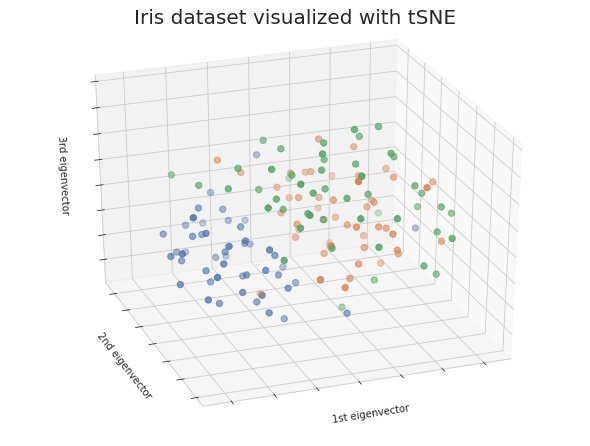

In [30]:
tsne = TSNE(n_components=3)
print(tsne.get_params())
points = tsne.fit_transform(iris_df[features])
plot_iris_3d(
    x = points[:,0],
    y = points[:,1],
    z = points[:,2],
    title = "Iris dataset visualized with tSNE")

{'angle': 0.5, 'early_exaggeration': 12.0, 'init': 'random', 'learning_rate': 200.0, 'method': 'barnes_hut', 'metric': 'correlation', 'min_grad_norm': 1e-07, 'n_components': 3, 'n_iter': 1000, 'n_iter_without_progress': 300, 'n_jobs': None, 'perplexity': 30.0, 'random_state': None, 'verbose': 0}


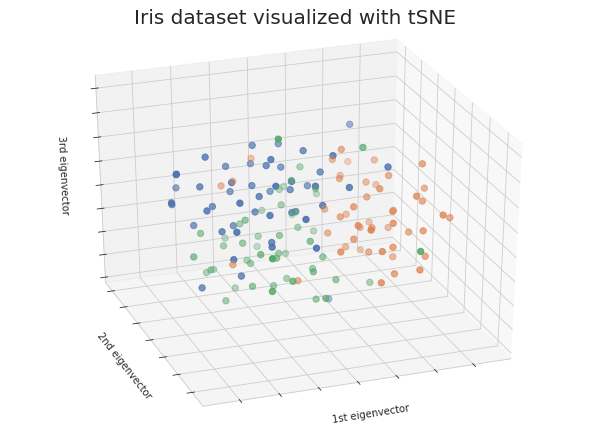

In [31]:
tsne = TSNE(n_components=3,metric='correlation')
print(tsne.get_params())
#tsne.set_params('metric':'correlation')
points = tsne.fit_transform(iris_df[features])
plot_iris_3d(
    x = points[:,0],
    y = points[:,1],
    z = points[:,2],
    title = "Iris dataset visualized with tSNE")

No handles with labels found to put in legend.


Legend


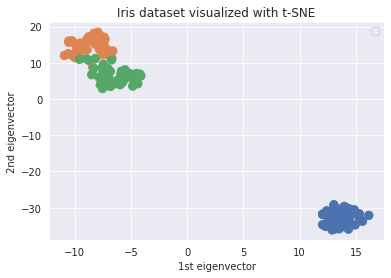

In [32]:
tsne = TSNE(n_components=2,metric='correlation')
#print(tsne.get_params())
points = tsne.fit_transform(iris_df[features])
plot_iris_2d(x = points[:, 0],y = points[:, 1],title = 'Iris dataset visualized with t-SNE')

**----------------------------------------Third Part------------------------------------**

------------Taking 0:setosa and 1:versicolor---------------
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.94      1.00      0.97        16

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



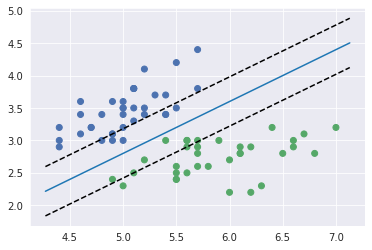

In [33]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
y = iris.target
X_1,X_2,X_3=X[:100],X[50:],np.concatenate((X[:50],X[100:]),axis=0)
y_1,y_2,y_3=y[:100],y[50:],np.concatenate((y[:50],y[100:]),axis=0)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_1, y_1, test_size = 0.30)
svc = SVC(kernel='linear', C=1).fit(X_train, y_train)

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train,cmap=CMAP);
ax = plt.gca()
xlim = ax.get_xlim()
print("------------Taking 0:setosa and 1:versicolor---------------")
k = svc.coef_[0]
a1 = -k[0] / k[1]
xx = np.linspace(xlim[0], xlim[1])
yy = a1 * xx - svc.intercept_[0] / k[1]
plt.plot(xx, yy)
yy = a1 * xx - (svc.intercept_[0] - 1) / k[1]
plt.plot(xx, yy, 'k--')
yy = a1 * xx - (svc.intercept_[0] + 1) / k[1]
plt.plot(xx, yy, 'k--')
y_pred = svc.predict(X_test)
print(classification_report(y_test,y_pred))


------------Taking 1: versicolor and 2:virginica---------------
              precision    recall  f1-score   support

           1       0.62      0.67      0.65        15
           2       0.64      0.60      0.62        15

    accuracy                           0.63        30
   macro avg       0.63      0.63      0.63        30
weighted avg       0.63      0.63      0.63        30



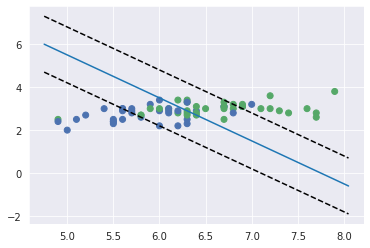

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, test_size = 0.30)
svc = SVC(kernel='linear', C=1).fit(X_train, y_train)

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train,cmap=CMAP);
ax = plt.gca()
xlim = ax.get_xlim()
print("------------Taking 1: versicolor and 2:virginica---------------")
k2 = svc.coef_[0]
a2 = -k2[0] / k2[1]
xx = np.linspace(xlim[0], xlim[1])
yy = a2 * xx - svc.intercept_[0] / k2[1]
plt.plot(xx, yy)
yy = a2 * xx - (svc.intercept_[0] - 1) / k2[1]
plt.plot(xx, yy, 'k--')
yy = a2 * xx - (svc.intercept_[0] + 1) / k2[1]
plt.plot(xx, yy, 'k--')
y_pred = svc.predict(X_test)
print(classification_report(y_test,y_pred))

------------Taking 0:setosa and 2:virginica---------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        20

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



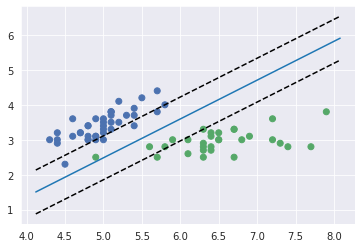

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_3, y_3, test_size = 0.30)
svc = SVC(kernel='linear', C=1).fit(X_train, y_train)

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train,cmap=CMAP);
ax = plt.gca()
xlim = ax.get_xlim()
print("------------Taking 0:setosa and 2:virginica---------------")
k3 = svc.coef_[0]
a3 = -k3[0] / k3[1]
xx = np.linspace(xlim[0], xlim[1])
yy = a3 * xx - svc.intercept_[0] / k3[1]
plt.plot(xx, yy)
yy = a3 * xx - (svc.intercept_[0] - 1) / k3[1]
plt.plot(xx, yy, 'k--')
yy = a3 * xx - (svc.intercept_[0] + 1) / k3[1]
plt.plot(xx, yy, 'k--')
y_pred = svc.predict(X_test)
print(classification_report(y_test,y_pred))

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)
svc = SVC(kernel='linear', C=1).fit(X_train, y_train)
y_pred = svc.predict(X_test)
#from sklearn.metrics import classification_report, confusion_matrix
#print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.85      0.69      0.76        16
           2       0.77      0.89      0.83        19

    accuracy                           0.84        45
   macro avg       0.87      0.86      0.86        45
weighted avg       0.85      0.84      0.84        45



In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)
svc = SVC(kernel='linear', C=1).fit(X_train, y_train)
y_pred = svc.predict(X_test)
#from sklearn.metrics import classification_report, confusion_matrix
#print(confusion_matrix(y_test,y_pred))
print("----------Classification report with C=1--------------")
print(classification_report(y_test,y_pred))
print("----------Classification report with C=0.001--------------")
svc = SVC(kernel='linear', C=0.001).fit(X_train, y_train)
y_pred = svc.predict(X_test)
print(classification_report(y_test,y_pred))
print("----------Classification report with C=1000---------------")
svc = SVC(kernel='linear', C=1000).fit(X_train, y_train)
y_pred = svc.predict(X_test)
print(classification_report(y_test,y_pred))

----------Classification report with C=1--------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.57      0.62      0.59        13
           2       0.69      0.65      0.67        17

    accuracy                           0.76        45
   macro avg       0.75      0.75      0.75        45
weighted avg       0.76      0.76      0.76        45

----------Classification report with C=0.001--------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.29      1.00      0.45        13
           2       0.00      0.00      0.00        17

    accuracy                           0.29        45
   macro avg       0.10      0.33      0.15        45
weighted avg       0.08      0.29      0.13        45

----------Classification report with C=1000---------------
              precision    recall  f1-score   support

          

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [39]:
print("--------------Classification report with C=0.001--------------")
svc = SVC(kernel='rbf', C=0.001).fit(X_train, y_train)
y_pred = svc.predict(X_test)
print(classification_report(y_test,y_pred))
print("--------------Classification report with C=1--------------")
svc = SVC(kernel='rbf', C=0.001).fit(X_train, y_train)
y_pred = svc.predict(X_test)
print(classification_report(y_test,y_pred))
print("--------------Classification report with C=1000--------------")
svc = SVC(kernel='rbf', C=1000).fit(X_train, y_train)
y_pred = svc.predict(X_test)
print(classification_report(y_test,y_pred))

--------------Classification report with C=0.001--------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.29      1.00      0.45        13
           2       0.00      0.00      0.00        17

    accuracy                           0.29        45
   macro avg       0.10      0.33      0.15        45
weighted avg       0.08      0.29      0.13        45

--------------Classification report with C=1--------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.29      1.00      0.45        13
           2       0.00      0.00      0.00        17

    accuracy                           0.29        45
   macro avg       0.10      0.33      0.15        45
weighted avg       0.08      0.29      0.13        45

--------------Classification report with C=1000--------------
              precision    recall  f1-score   support


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [0]:
def plot_decision_regions(X, y,classifier, h=0.02):

    # setup marker generator and color map
    colors = ('red', 'blue',)
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h),np.arange(x2_min, x2_max, h))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

No handles with labels found to put in legend.


['setosa' 'versicolor' 'virginica']
----------Taking 0:setosa and 1:versicolor as a pair-------


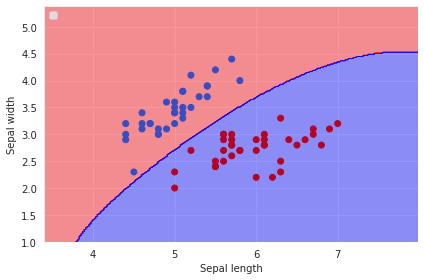

In [42]:
print(iris.target_names)
print("----------Taking 0:setosa and 1:versicolor as a pair-------")
X_train, X_test, y_train, y_test = train_test_split(X_1, y_1, test_size = 0.30)
#svc = SVC(kernel='linear', C=1).fit(X_train, y_train)
svm = SVC(kernel='rbf',C=1)
# Train the classifier
svm.fit(X_train, y_train)

# Visualize the decision boundaries
plot_decision_regions(X_train, y_train, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

No handles with labels found to put in legend.


----------Taking 1:versicolor and 2:virginica as a pair-------


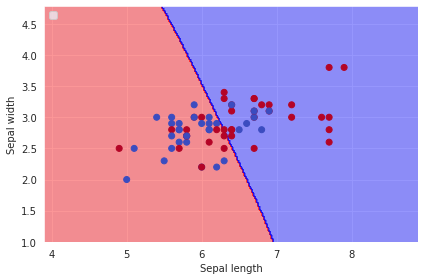

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, test_size = 0.30)
#svc = SVC(kernel='linear', C=1).fit(X_train, y_train)
svm = SVC(kernel='rbf',C=1)
# Train the classifier
svm.fit(X_train, y_train)
print("----------Taking 1:versicolor and 2:virginica as a pair-------")
# Visualize the decision boundaries
plot_decision_regions(X_train, y_train, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

No handles with labels found to put in legend.


----------Taking 0:setosa and 2:virginica as a pair-------


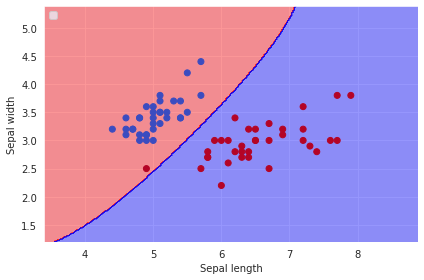

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X_3, y_3, test_size = 0.30)
#svc = SVC(kernel='linear', C=1).fit(X_train, y_train)
svm = SVC(kernel='rbf',C=1)
# Train the classifier
svm.fit(X_train, y_train)
print("----------Taking 0:setosa and 2:virginica as a pair-------")
# Visualize the decision boundaries
plot_decision_regions(X_train, y_train, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

**--------------------------------------END OF ASSIGNMENT-------------------------------**